### This notebook demonstrates how to use matplotlib and seaborn to build line charts involving major/ minor ticks, markers and data labels for the last point. It retrieve data tables from SingStat Table Builder using the [API function](https://www.tablebuilder.singstat.gov.sg/publicfacing/initApiList.action). 

### Example 1 

In [1]:
import json
import urllib.request
urlData = "https://www.tablebuilder.singstat.gov.sg/publicfacing/api/json/title/15144.json"

webURL = urllib.request.urlopen(urlData)
data = webURL.read()
#print(data)

In [2]:
df = json.loads(data)

In [3]:
# note that there are two different kinds of data tables/ structures
# df

In [4]:
from pandas.io.json import json_normalize

In [5]:
# population by age group for year 2000 to 2019
json_normalize(df['Level1'])

,level_1,quarter,value
0,Total Unemployment Rate,1992-Q1,1.5
1,Resident Unemployment Rate,1992-Q1,1.8
2,Citizen Unemployment Rate,1992-Q1,1.8
3,Total Unemployment Rate,1992-Q2,2.4
4,Resident Unemployment Rate,1992-Q2,2.8
5,Citizen Unemployment Rate,1992-Q2,2.9
6,Total Unemployment Rate,1992-Q3,1.6
7,Resident Unemployment Rate,1992-Q3,2
8,Citizen Unemployment Rate,1992-Q3,2
9,Total Unemployment Rate,1992-Q4,1.7


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df_new = json_normalize(df['Level1'])
df_new.columns = ['Type','Quarter','Rate']

In [8]:
df_new.dtypes

Type       object
Quarter    object
Rate       object
dtype: object

In [9]:
len(list(range(1992, 2020)))

28

In [10]:
range(28)

range(0, 28)

In [11]:
df_new['Rate'] = df_new['Rate'].astype(float)

In [12]:
list(df_new['Type'].unique())

['Total Unemployment Rate',
 'Resident Unemployment Rate',
 'Citizen Unemployment Rate']

In [13]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

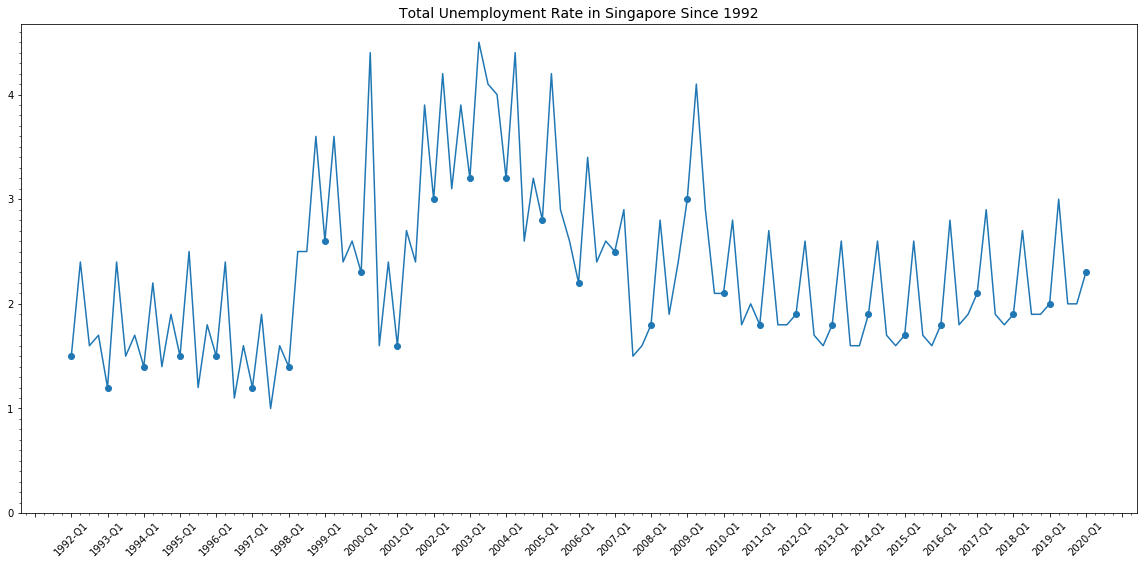

In [14]:
fig, ax = plt.subplots(figsize=(20,9))

#g = sns.lineplot(data = data, x='Quarter',y='Rate', hue='Type')
x = df_new[df_new['Type']==list(df_new['Type'].unique())[0]]['Quarter']
y = df_new[df_new['Type']==list(df_new['Type'].unique())[0]]['Rate']

ax.plot(x, y, 'o',  ls='-', markevery=4) 
plt.xticks(rotation=45)
plt.ylim(bottom=0)

ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.title('Total Unemployment Rate in Singapore Since 1992', fontsize=14)
plt.savefig('plotunemp.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Citizen Unemployment Rate in Singapore Since 1992')

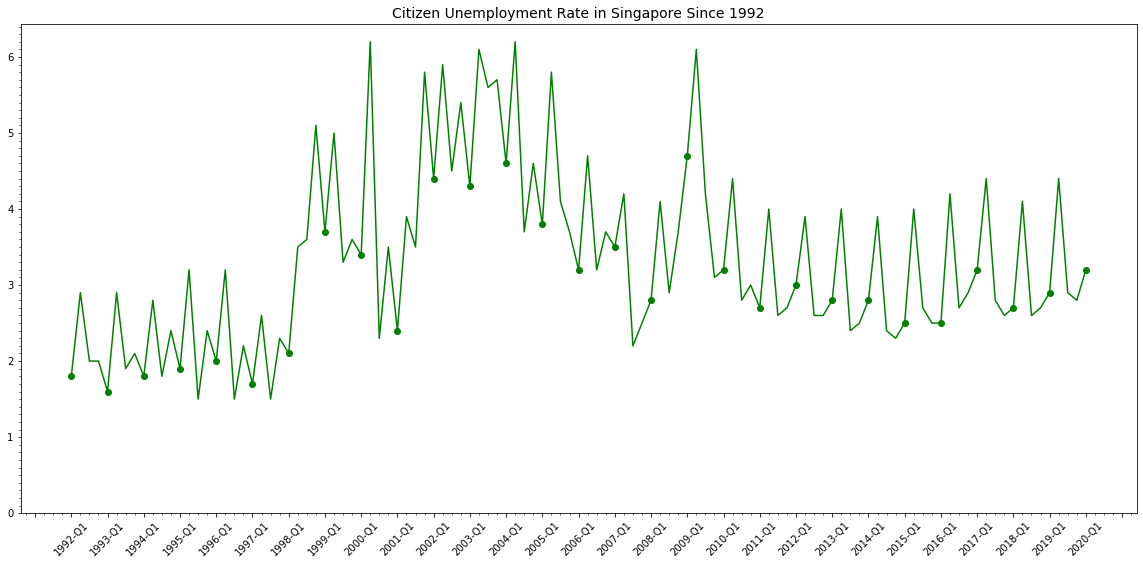

In [15]:
fig, ax = plt.subplots(figsize=(20,9))

#g = sns.lineplot(data = data, x='Quarter',y='Rate', hue='Type')
x = df_new[df_new['Type']==list(df_new['Type'].unique())[2]]['Quarter']
y = df_new[df_new['Type']==list(df_new['Type'].unique())[2]]['Rate']

ax.plot(x, y, 'o',  ls='-', markevery=4, color='green')
plt.xticks(rotation=45)
plt.ylim(bottom=0)

ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.title('Citizen Unemployment Rate in Singapore Since 1992', fontsize=14)
#plt.savefig('plotunemp.png', dpi=300, bbox_inches='tight')


### Example 2 

In [16]:
urlData = "https://www.tablebuilder.singstat.gov.sg/publicfacing/api/json/title/14603.json"

webURL = urllib.request.urlopen(urlData)
data = webURL.read()
df = json.loads(data)
df_new = json_normalize(df['Level1'])

In [17]:
df_new.tail(10)

,level_1,value,year
28,Median (50th Percentile),3949,2015
29,20th Percentile,2012,2015
30,Median (50th Percentile),4056,2016
31,20th Percentile,2106,2016
32,Median (50th Percentile),4232,2017
33,20th Percentile,2200,2017
34,Median (50th Percentile),4437,2018
35,20th Percentile,2340,2018
36,Median (50th Percentile),4563,2019
37,20th Percentile,na,2019


In [18]:
df_new.dtypes

level_1    object
value      object
year       object
dtype: object

In [19]:
df_new['value'] = pd.to_numeric(df_new['value'], errors="coerce")

In [20]:
df_new.tail()

,level_1,value,year
33,20th Percentile,2200.0,2017
34,Median (50th Percentile),4437.0,2018
35,20th Percentile,2340.0,2018
36,Median (50th Percentile),4563.0,2019
37,20th Percentile,NaN,2019


In [21]:
df_new['year'] = df_new['year'].astype(int)

In [22]:
df_new.columns=['Percentile','Income','Year']

Text(0.5, 1.0, 'Gross Monthly Income From Work (Including Employer CPF) Of Full-time Employed Residents, Annual')

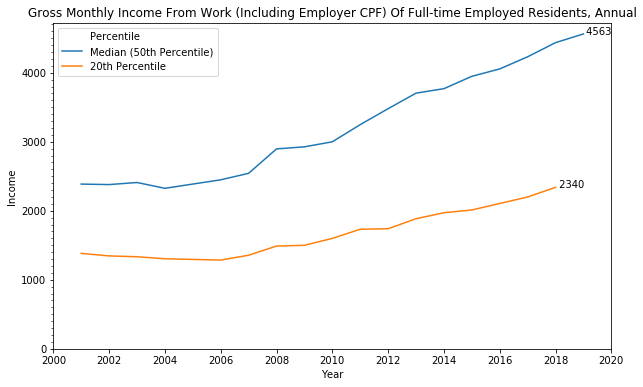

In [23]:
# plt.figure(figsize=(10,6))
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_new, x='Year',y='Income',hue='Percentile')
plt.ylim(bottom=0)
plt.xlim(df_new['Year'].min()-1, df_new['Year'].max()+1)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(100))

text1=df_new[(df_new['Year']==2019) & (df_new['Percentile']=='Median (50th Percentile)')]['Income'].astype(int).to_string(index=False)
plt.text(df_new[(df_new['Year']==2019) & (df_new['Percentile']=='Median (50th Percentile)')]['Year'], 
            df_new[(df_new['Year']==2019) & (df_new['Percentile']=='Median (50th Percentile)')]['Income'], text1)

text2=df_new[(df_new['Year']==2018) & (df_new['Percentile']=='20th Percentile')]['Income'].astype(int).to_string(index=False)
plt.text(df_new[(df_new['Year']==2018) & (df_new['Percentile']=='20th Percentile')]['Year'], 
            df_new[(df_new['Year']==2018) & (df_new['Percentile']=='20th Percentile')]['Income'], text2)

plt.title('Gross Monthly Income From Work (Including Employer CPF) Of Full-time Employed Residents, Annual', fontsize=12)

References:  
https://matplotlib.org/3.1.0/gallery/ticks_and_spines/major_minor_demo.html      
https://stackoverflow.com/questions/44785722/adding-label-to-last-point-matplotlib-line-chart  